# Teoría del Sistema Inmune Artificial (AIS)

El **Sistema Inmune Artificial (AIS)** es un algoritmo bio-inspirado que imita las funciones del sistema inmunológico humano, el cual es capaz de detectar patógenos (agentes extraños) y aprender a combatirlos a lo largo del tiempo. El AIS toma principios de este sistema biológico y los adapta para resolver problemas de optimización, clasificación, y detección de anomalías.

### Principios Claves:

1. **Detección de Anomalías**: El sistema inmunológico puede identificar cuerpos extraños o anómalos que no pertenecen al organismo. En el AIS, esta capacidad se traduce en la identificación de patrones inusuales en conjuntos de datos, como transacciones fraudulentas o fallos en sistemas.
   
2. **Diversidad y Redundancia**: El sistema inmunológico tiene una diversidad de anticuerpos para reconocer diferentes patógenos. En el AIS, esto se implementa creando múltiples soluciones (anticuerpos) que cubren varias áreas del espacio de búsqueda.

3. **Memoria**: El sistema inmunológico recuerda los patógenos con los que ha interactuado anteriormente para enfrentarlos más rápido en el futuro. El AIS también retiene soluciones exitosas para su reutilización en el futuro, lo que permite una mayor eficiencia en problemas recurrentes.

4. **Selección y Mutación**: En el sistema inmunológico, los anticuerpos efectivos se replican y mutan para mejorar su respuesta. De forma similar, el AIS selecciona las soluciones más efectivas (anticuerpos) y las ajusta ligeramente mediante mutaciones para explorar nuevas áreas del espacio de búsqueda.

### Componentes Principales del AIS:

- **Antígenos**: Los problemas a resolver o los patrones anómalos a detectar. En el contexto de Machine Learning, pueden ser las observaciones (transacciones, datos) que queremos analizar.
  
- **Anticuerpos**: Soluciones generadas para detectar los antígenos. Representan posibles soluciones que se ajustan a los problemas o anomalías. En nuestro ejemplo, cada anticuerpo podría representar un centro en el espacio de datos que se ajusta a las transacciones fraudulentas.

- **Afinidad**: En el contexto de AIS, la afinidad mide qué tan bien un anticuerpo puede detectar o resolver un problema (anomalía). Se puede interpretar como una métrica de desempeño o fitness.

### Aplicaciones en Machine Learning:

El AIS tiene varias aplicaciones directas en el campo de Machine Learning, incluyendo:

- **Detección de anomalías**: En sistemas de detección de fraudes o ciberseguridad, el AIS puede detectar transacciones o accesos inusuales.
  
- **Clasificación**: En problemas de clasificación, el AIS puede aprender a distinguir entre diferentes clases a través del uso de anticuerpos que cubren diferentes regiones del espacio de datos.

- **Optimización**: El AIS se utiliza en problemas de optimización compleja, donde busca soluciones en espacios de búsqueda amplios y complicados, evitando caer en mínimos locales.

### Ventajas de AIS:

- **Adaptabilidad**: El AIS puede adaptarse a nuevas amenazas y anomalías con el tiempo, mejorando su capacidad de detección.
- **Diversidad**: Mantiene una población diversa de soluciones, lo que es útil para problemas con espacios de búsqueda grandes.
- **Memoria**: El uso de memoria permite que el AIS mejore con el tiempo al recordar soluciones pasadas.

### Desventajas:

- **Complejidad computacional**: La evaluación constante de anticuerpos puede ser computacionalmente costosa en problemas de gran escala.
- **Convergencia lenta**: En algunos casos, el AIS puede ser más lento en converger a una solución óptima en comparación con otros métodos de optimización.

El AIS es una herramienta poderosa y flexible para resolver problemas de optimización y detección de anomalías, con aplicaciones que van desde la ciberseguridad hasta la medicina y la ingeniería.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AIS import AIS

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

# Generamos datos sintéticos de transacciones
def generate_data(n_samples=200):
    # Transacciones no fraudulentas (normalmente distribuidas)
    normal_transactions = np.random.normal(loc=50, scale=10, size=(n_samples, 2))  # Loc es la media, scale es la desviación estándar
    # Transacciones fraudulentas (distribuidas en un rango diferente)
    fraudulent_transactions = np.random.normal(loc=80, scale=5, size=(int(n_samples * 0.1), 2))  # 10% de fraudes
    # Etiquetas: 0 para no fraude, 1 para fraude
    labels = np.array([0] * n_samples + [1] * int(n_samples * 0.1))
    data = np.vstack((normal_transactions, fraudulent_transactions))
    
    return data, labels

# Generar los datos
data, labels = generate_data()


In [3]:
# Parámetros del problema
n_antibodies = 10  # Número de anticuerpos
dim = 2            # Dimensionalidad (2 características: monto de la transacción y otra característica)
lower_bound = 0    # Límite inferior de las transacciones
upper_bound = 100  # Límite superior de las transacciones
max_iter = 50      # Iteraciones del algoritmo

# Crear y ejecutar el AIS
ais = AIS(n_antibodies, dim, lower_bound, upper_bound, max_iter)
best_antibody = ais.optimize(data, labels)

# Resultado final
print(f"\nMejor anticuerpo encontrado (posición): {best_antibody.position}")
print(f"Con una afinidad (distancia media a transacciones fraudulentas): {best_antibody.affinity}")


Iteration 1/50, Best Affinity: 34.454217313512274
Iteration 2/50, Best Affinity: 33.58648535973562
Iteration 3/50, Best Affinity: 32.98807563396637
Iteration 4/50, Best Affinity: 32.01556961911474
Iteration 5/50, Best Affinity: 31.018791773146507
Iteration 6/50, Best Affinity: 31.1477955989929
Iteration 7/50, Best Affinity: 30.555509800150315
Iteration 8/50, Best Affinity: 29.168320903361064
Iteration 9/50, Best Affinity: 28.10108072044779
Iteration 10/50, Best Affinity: 27.225418305880982
Iteration 11/50, Best Affinity: 25.931513525003915
Iteration 12/50, Best Affinity: 24.966205579405504
Iteration 13/50, Best Affinity: 24.188908852537637
Iteration 14/50, Best Affinity: 23.10870441769404
Iteration 15/50, Best Affinity: 22.87127724722968
Iteration 16/50, Best Affinity: 22.428053675973594
Iteration 17/50, Best Affinity: 21.526339459218786
Iteration 18/50, Best Affinity: 20.4729734102328
Iteration 19/50, Best Affinity: 19.67733041066559
Iteration 20/50, Best Affinity: 18.856003529940022


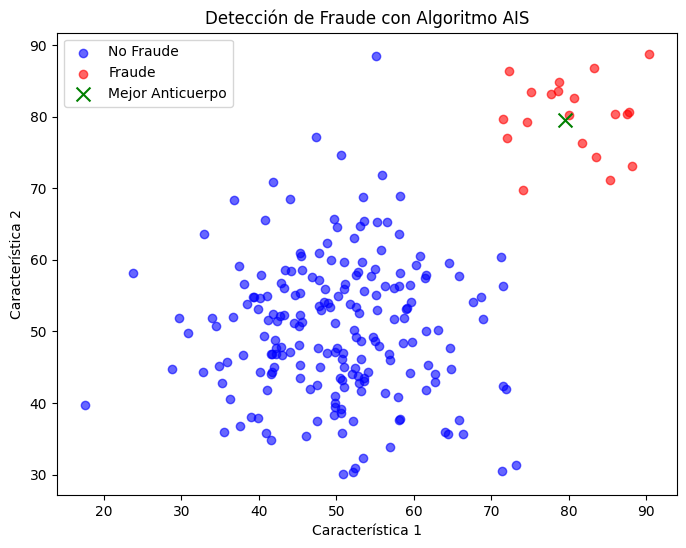

In [4]:
# Visualización de las transacciones y el mejor anticuerpo
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label="No Fraude", c='blue', alpha=0.6)
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label="Fraude", c='red', alpha=0.6)
plt.scatter(best_antibody.position[0], best_antibody.position[1], label="Mejor Anticuerpo", c='green', marker='x', s=100)
plt.title("Detección de Fraude con Algoritmo AIS")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()
